In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
housing_raw = pd.read_csv(
    "./housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price")
                    .loc[:,
                         ["San Francisco", 
                          "Los Angeles", 
                          "San Diego", 
                          "Tulare"]
                        ]
                    .assign(overall_avg = lambda x: x.mean(axis=1))
                   )

ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


In [3]:
bins = np.linspace(0, 1750000, 8)
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1-1.25m", "1.25m-1.5m", "1.5m+"]

ca_housing["price_bins"] = pd.cut(
    ca_housing["median_active_list_price"], 
    bins=bins, 
    labels=labels
)

# Line Charts

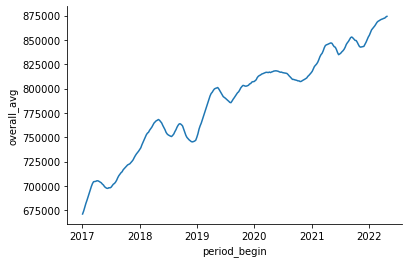

In [4]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index, # note if we don't specify x and y all df series get plotted
    y="overall_avg"
)

sns.despine()

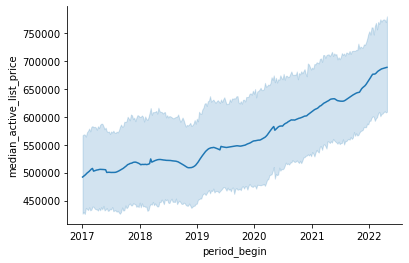

In [5]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing,
#     ci=None,
#     estimator=min
)

sns.despine()

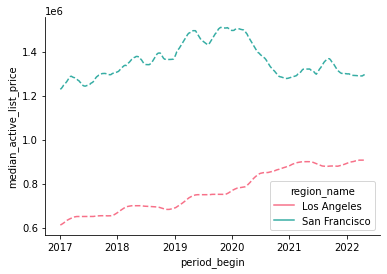

In [6]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing.query("region_name in ['Los Angeles', 'San Francisco']"),
    hue="region_name",      
    palette="husl",
    ls="--"
)
    
sns.despine()

# Basic Chart Types



### Bar Charts

In [8]:
diamonds = pd.read_csv("./Diamonds Prices2022.csv").drop("Unnamed: 0", axis=1)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='cut', ylabel='price'>

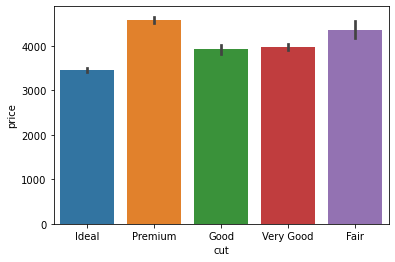

In [9]:
sns.barplot(x="cut", y="price", data=diamonds)

<AxesSubplot:xlabel='price', ylabel='cut'>

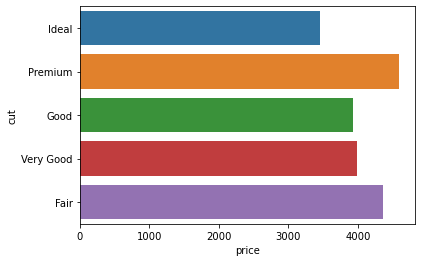

In [10]:
# plot your numeric series as 'x' to create a horizontal bar chart
sns.barplot(
    x="price", # plot your numeric series as 'x' to create a horizontal bar chart
    y="cut", 
    ci=None, # disable error bars
    data=diamonds
)

<AxesSubplot:xlabel='price', ylabel='cut'>

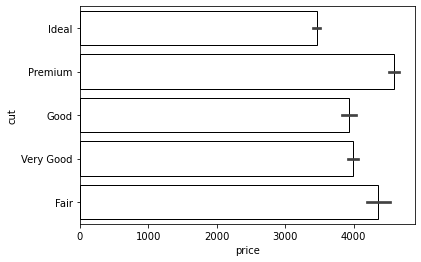

In [11]:
# matplotlib formatting options (e.g. 'edgecolor') work in simple (one plot) seaborn plotting functions
sns.barplot(
    x="price",
    y="cut",
    data=diamonds,
    facecolor="white",
    edgecolor="black"
)

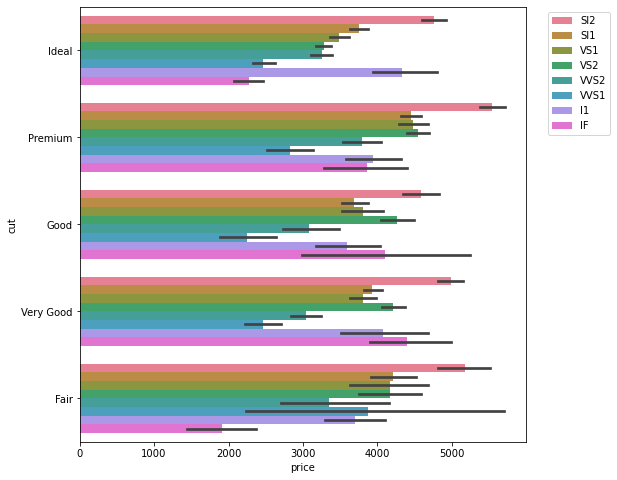

In [12]:
import matplotlib.pyplot as plt # matplotlib syntax can be used

fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(
    y="cut", 
    x="price", 
    hue="clarity", # specify hue to create a grouped barchart
    data=diamonds,
    palette="husl"
)


ax.legend(bbox_to_anchor=(1.2, 1)) # matplotlib syntax can be used

### Histograms

<AxesSubplot:xlabel='price', ylabel='Percent'>

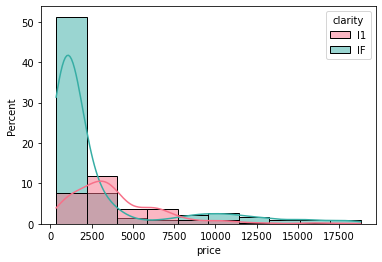

In [13]:
sns.histplot(
    x="price", 
    hue="clarity", 
    data=diamonds.query("clarity in ['I1', 'IF']"),
    palette="husl",
    stat='percent',
    bins=10,
#     binwidth=1000,
    kde=True
)

<AxesSubplot:xlabel='price', ylabel='clarity'>

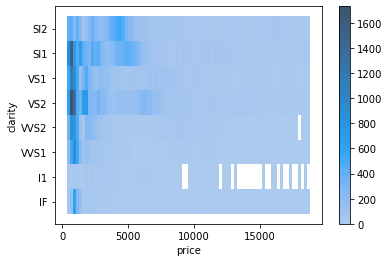

In [14]:
sns.histplot(
    x="price", 
    y="clarity", 
    data=diamonds,
    cbar=True
)

### Scatterplot

<AxesSubplot:xlabel='x', ylabel='price'>

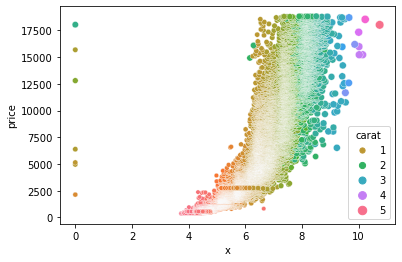

In [15]:
sns.scatterplot(
    x="x",
    y="price", 
    data=diamonds,
    hue='carat',
    palette="husl",
    size="carat"
)

# Box and Violin Plots

<AxesSubplot:xlabel='clarity', ylabel='price'>

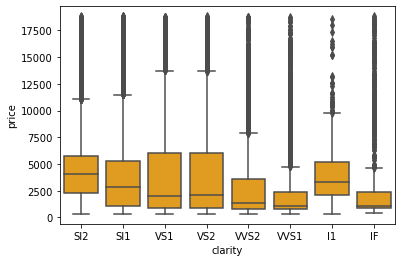

In [16]:
sns.boxplot(
    x="clarity",
    y="price", 
    color="orange", 
    data=diamonds
)

<AxesSubplot:xlabel='price', ylabel='clarity'>

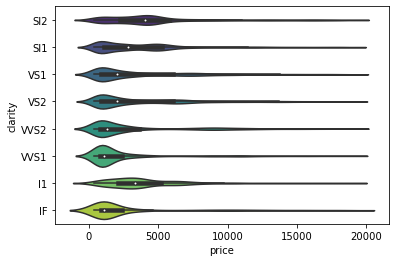

In [17]:
sns.violinplot(y="clarity", x="price", palette="viridis", data=diamonds)

# Linear Relationship Plots

### Regplot

<AxesSubplot:xlabel='table', ylabel='carat'>

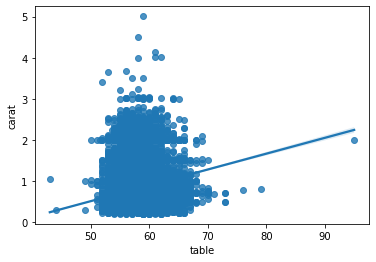

In [18]:
sns.regplot(x="table", y="carat", data=diamonds)

In [19]:
import scipy.stats as stats

stats.linregress(diamonds["table"], diamonds["carat"])

LinregressResult(slope=0.038521844309682515, intercept=-1.4154246123474983, rvalue=0.18160170810243176, pvalue=0.0, stderr=0.000898143141922515, intercept_stderr=0.051643846304818504)

### LM Plot

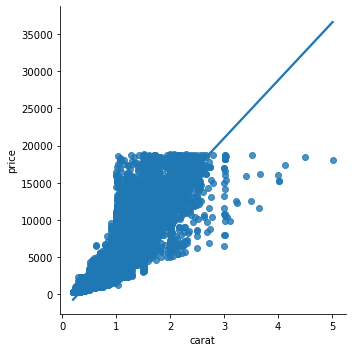

In [20]:
sns.lmplot(x="carat", y="price", data=diamonds)

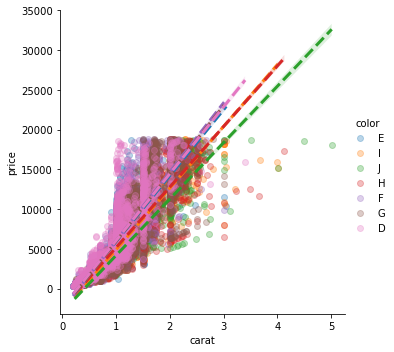

In [21]:
sns.lmplot(
    x="carat", 
    y="price", 
    hue="color",
    line_kws={"ls": "--", "linewidth": 3}, # format lines with line_kws, formatting comes from matplotlib
    scatter_kws = {"alpha": .3}, # format scatterplot with scatter_kws, formatting comes from matplotlib
    data=diamonds
)

In [22]:
# print slope and intercept for each category

for category in diamonds["clarity"].unique():
    df_filtered = diamonds.loc[diamonds["clarity"] == category]
    print(f"{category}: {stats.linregress(df_filtered['carat'], df_filtered['price'])[0:2]}")

SI2: (7870.255440069468, -3418.34009948491)
SI1: (8090.358507749835, -2884.7206233924144)
VS1: (9000.72595442963, -2705.4966758167475)
VS2: (8626.173116706015, -2664.8927726309657)
VVS2: (10077.188051237523, -2724.3039286292474)
VVS1: (10469.250265041874, -2746.283873483347)
I1: (4209.793400455634, -1480.5583747037213)
IF: (11625.44062662276, -3007.4372354041907)


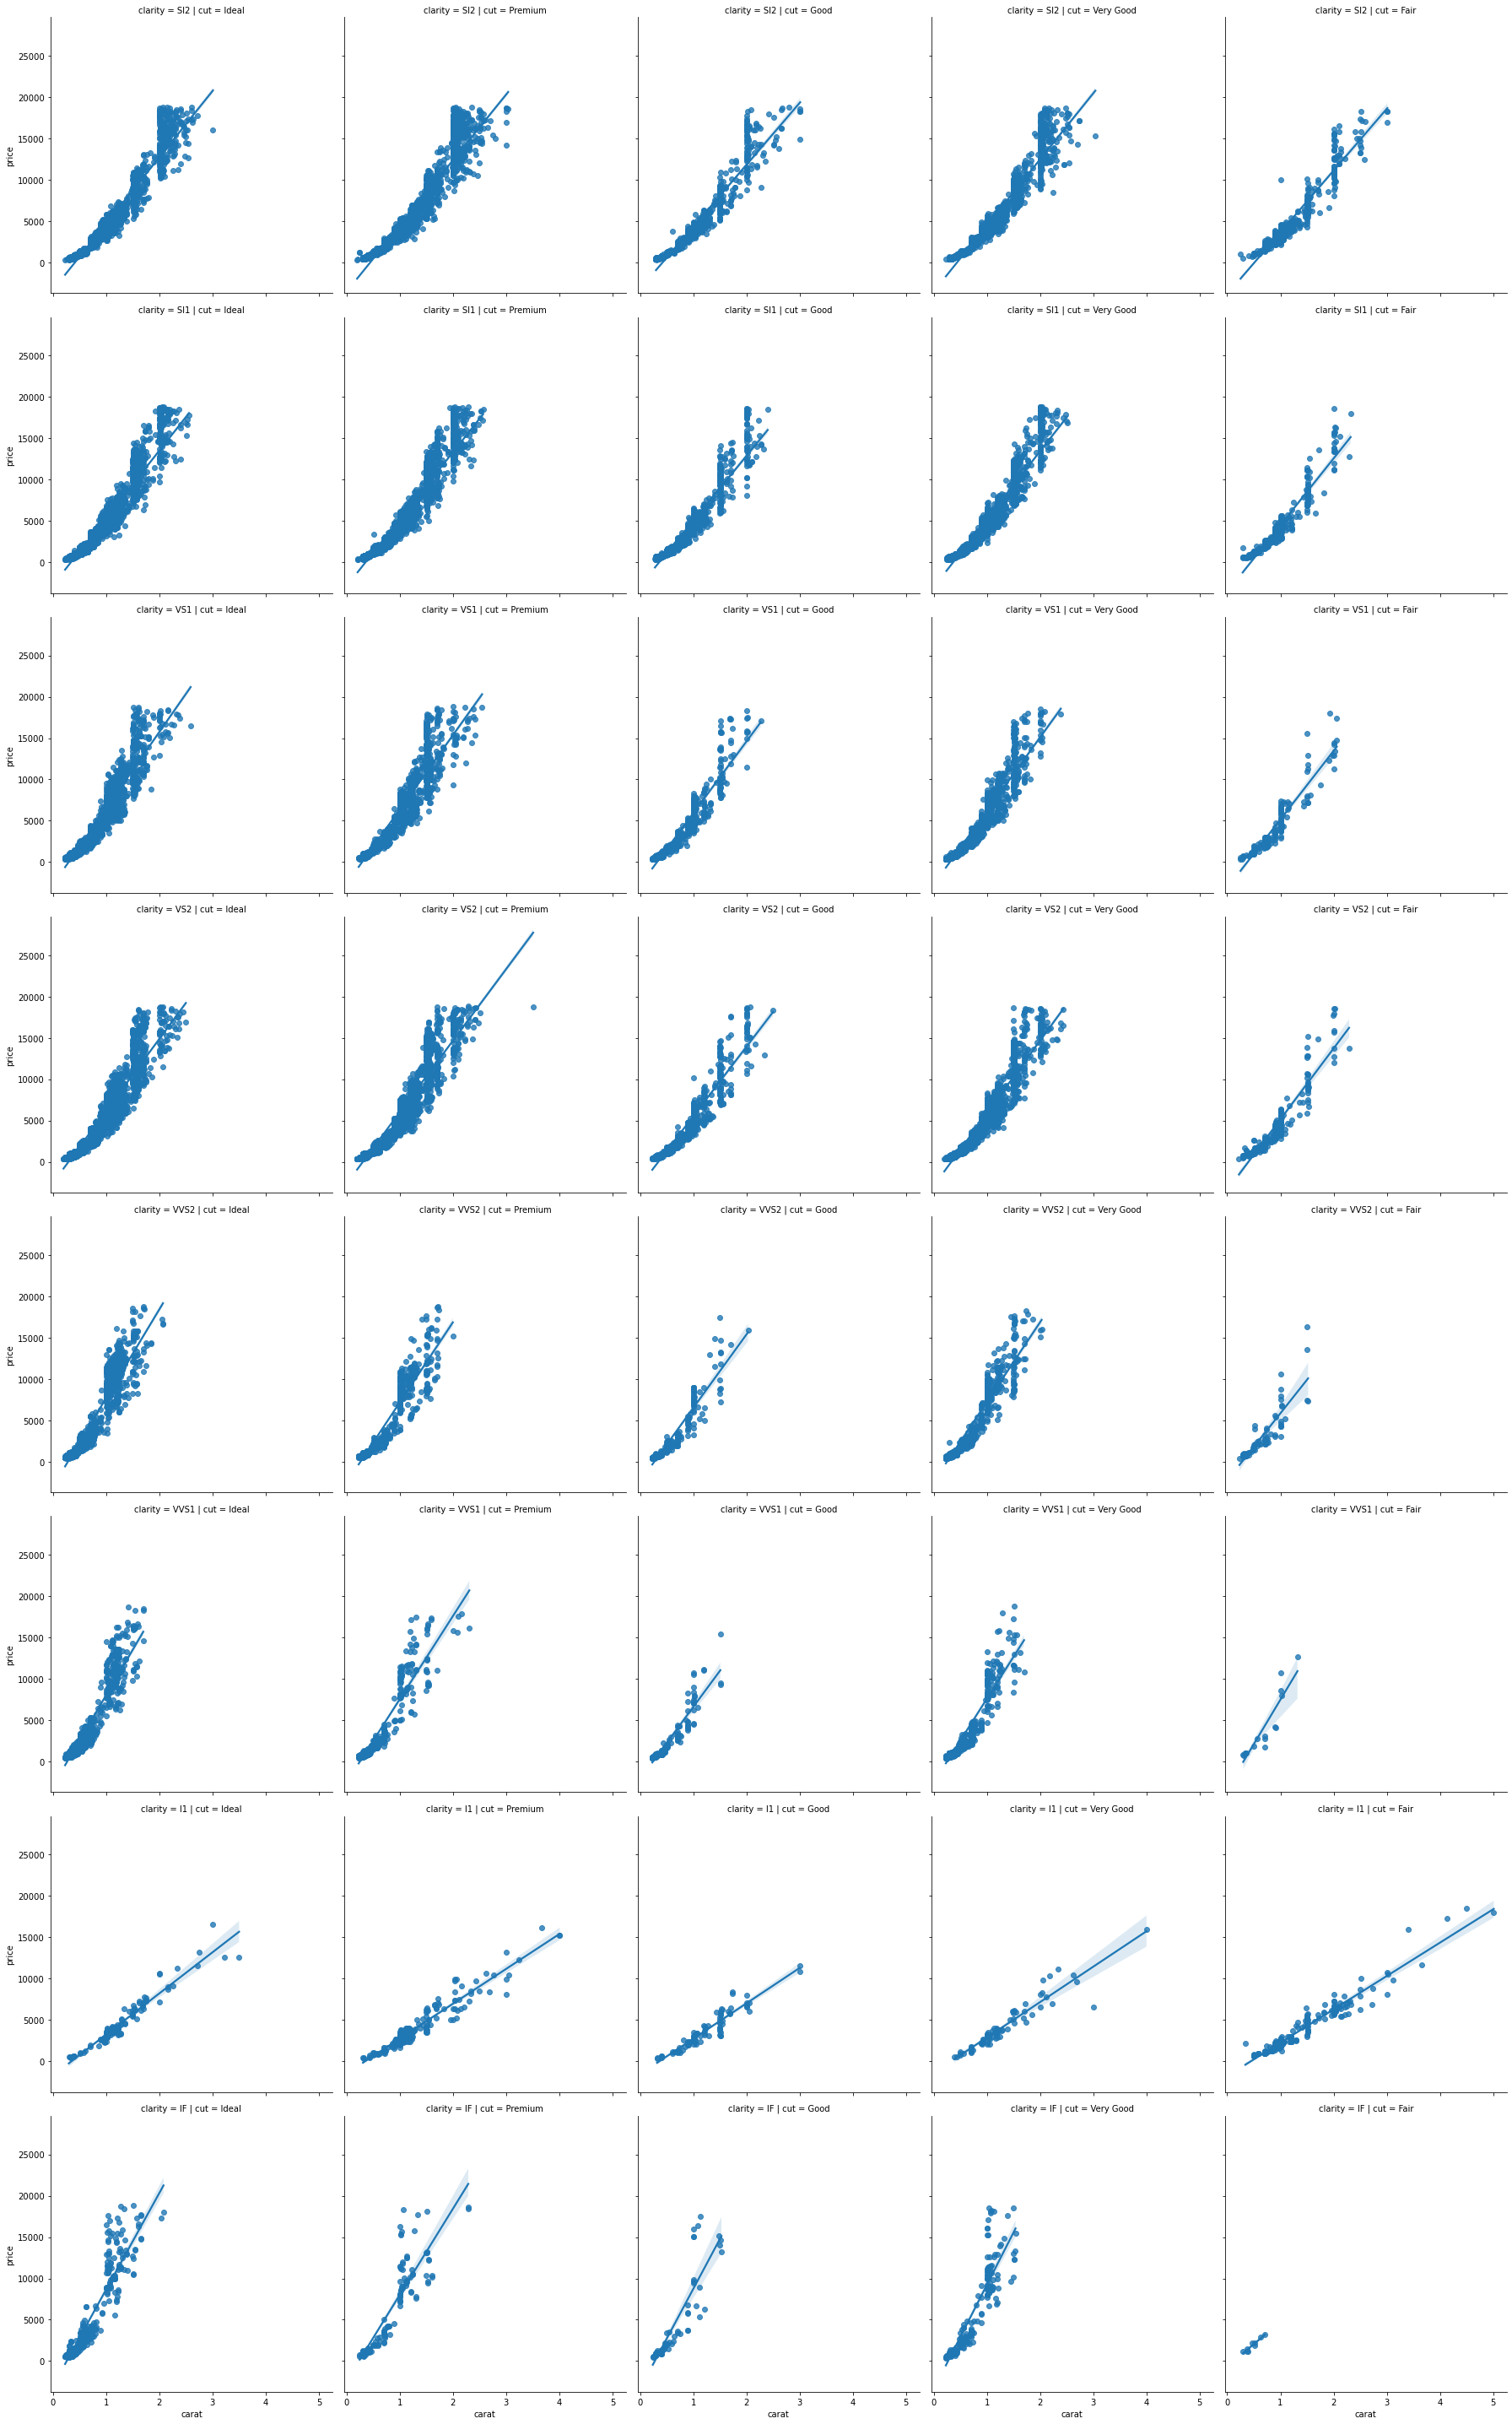

In [23]:
# Generate grid of linear plots based on category combinations specified in 'row' and 'col'

sns.lmplot(
    x="carat", 
    y="price", 
    row="clarity",
    col="cut",
    data=diamonds
)

### Jointplot

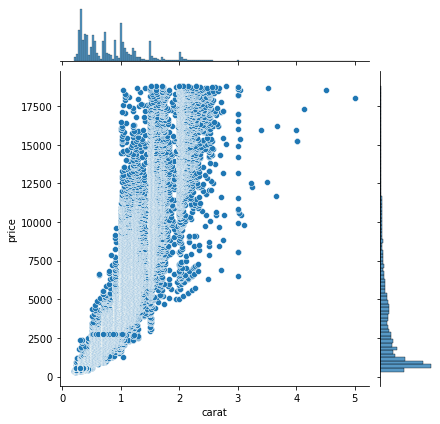

In [24]:
sns.jointplot(x="carat", y="price", data=diamonds)

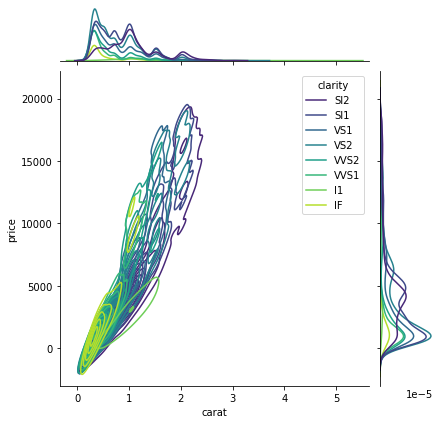

In [25]:
sns.jointplot(
    x="carat", 
    y="price",
    color="orange",
    hue='clarity',
    kind="kde",
    palette="viridis",
    data=diamonds
)

### Pairplot

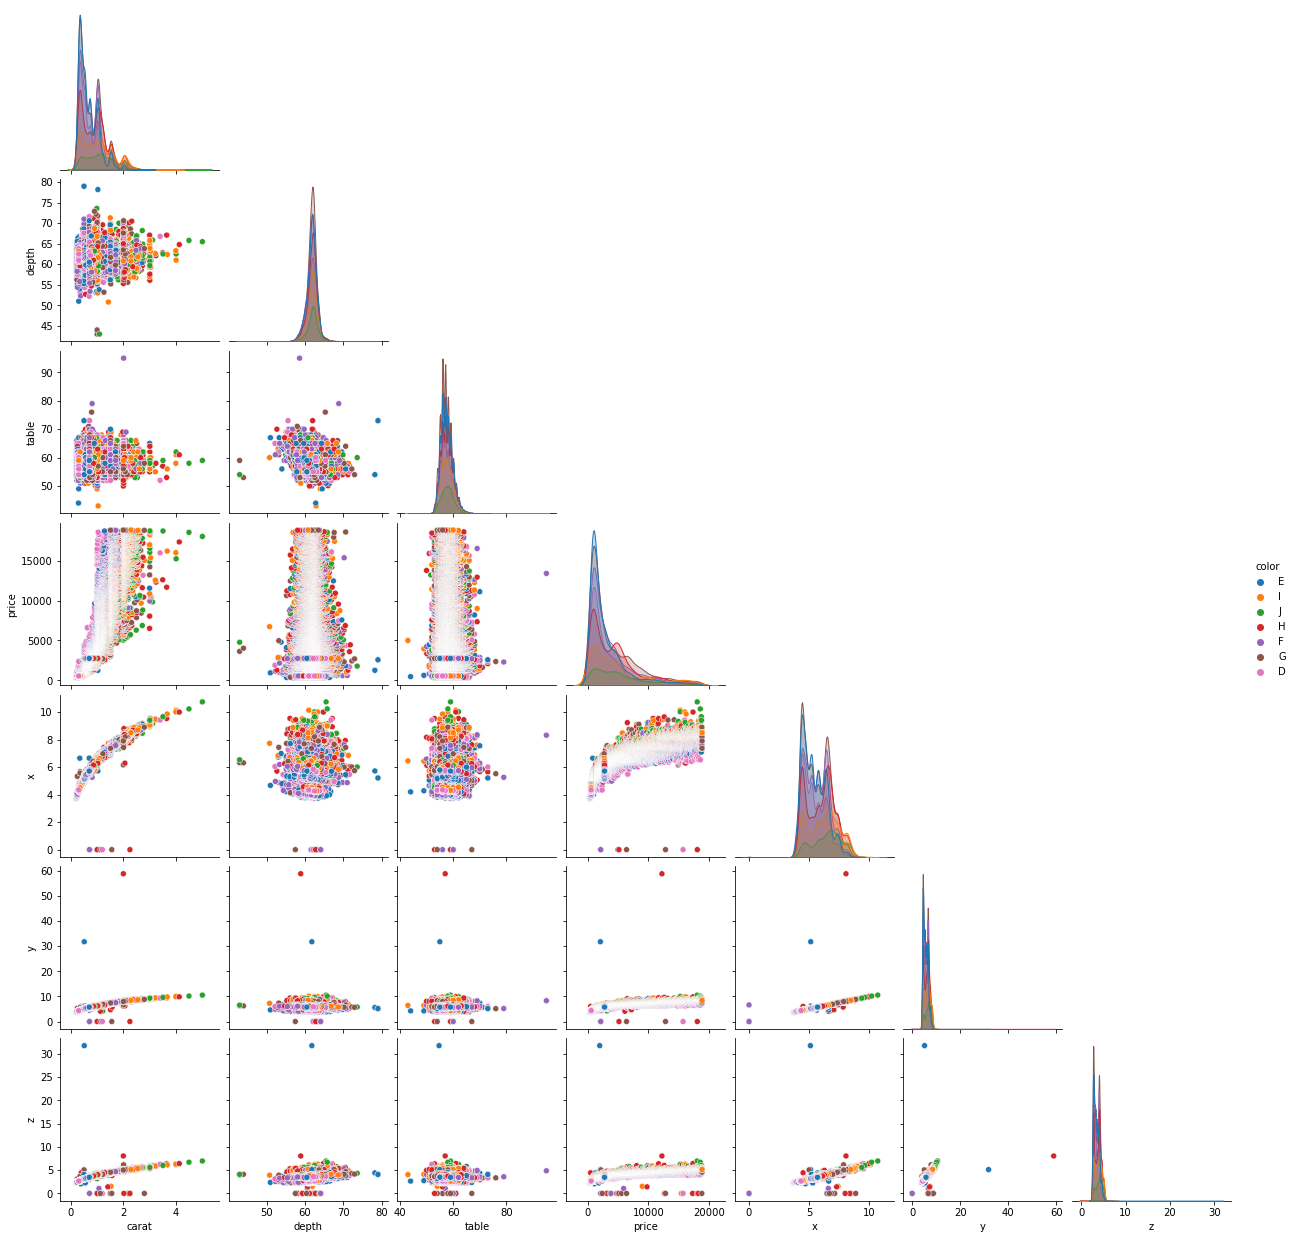

In [26]:
sns.pairplot(
    diamonds, 
    hue="color", 
    diag_kind="kde",
    corner=True,
#     palette="viridis"
)

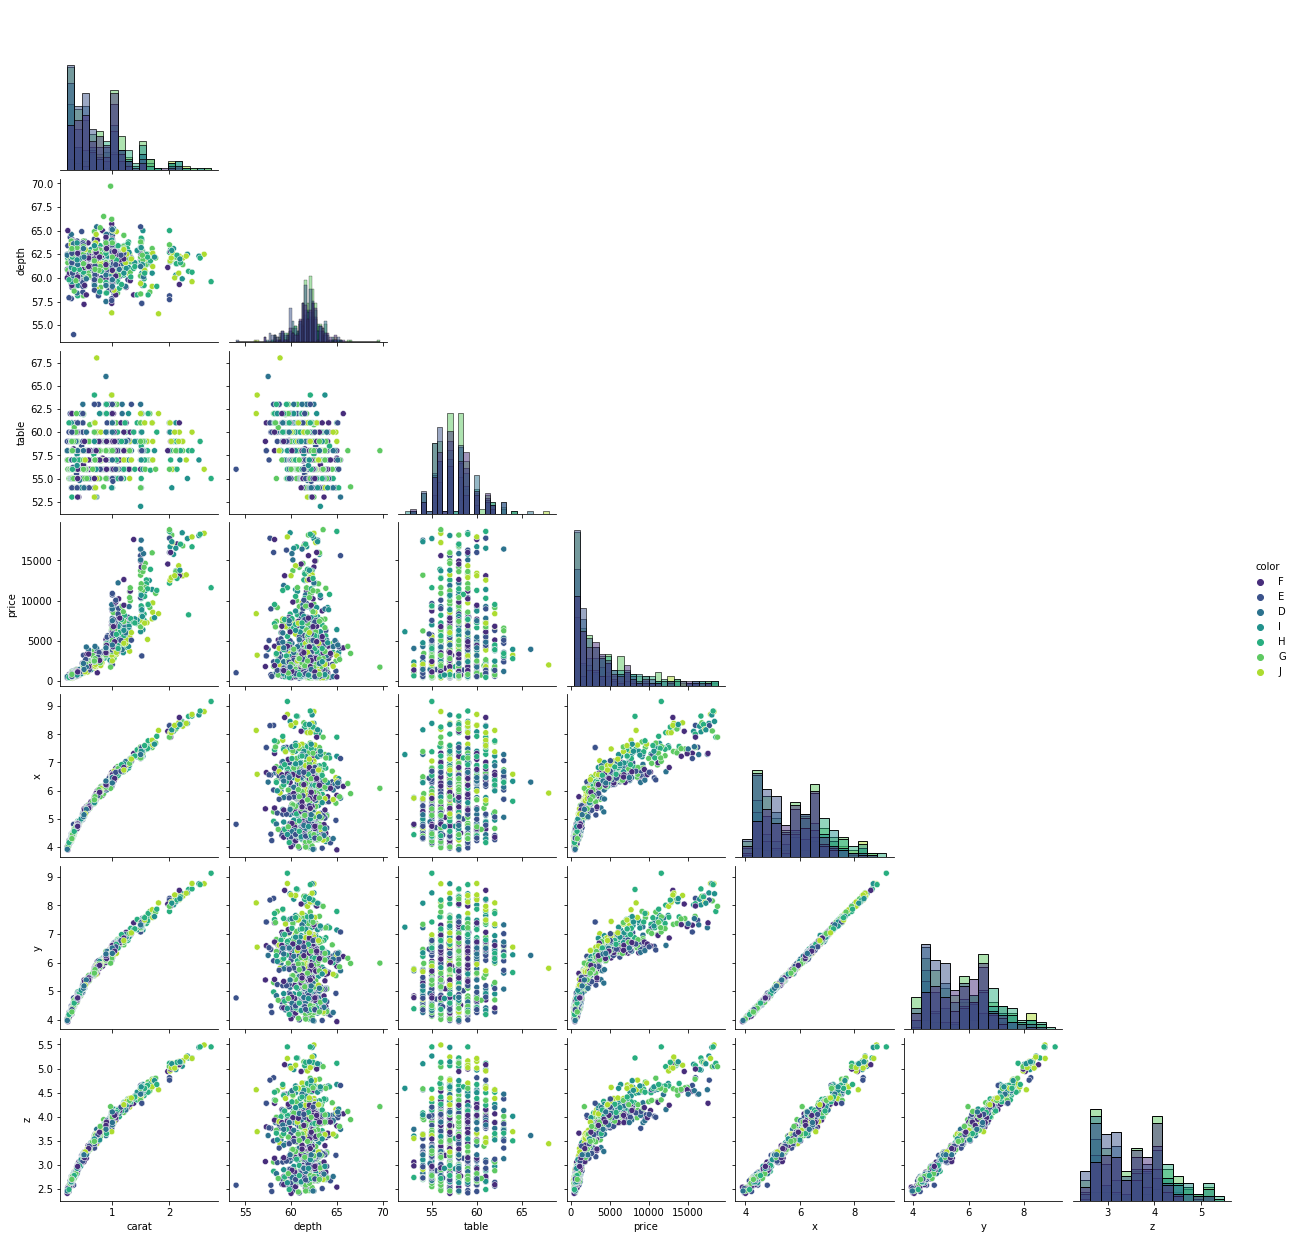

In [27]:
sns.pairplot(
    diamonds.sample(1000), 
    hue="color",
    diag_kind="hist",
    palette="viridis",
    corner=True
)

# Heatmaps

In [28]:
diamond_pivot = diamonds.pivot_table(
    index="cut",
    columns="color",
    values={"carat": "mean"}
)

diamond_pivot.head()

carat                                                    \
color             D         E         F         G         H         I   
cut                                                                     
Fair       0.920123  0.856607  0.904712  1.023822  1.219175  1.198057   
Good       0.744517  0.745134  0.775930  0.850896  0.914729  1.057222   
Ideal      0.565766  0.578401  0.655829  0.700715  0.799525  0.913029   
Premium    0.721547  0.717742  0.826985  0.841488  1.016449  1.144937   
Very Good  0.696424  0.676327  0.740961  0.766799  0.915948  1.046952   

                     
color             J  
cut                  
Fair       1.341176  
Good       1.099544  
Ideal      1.063594  
Premium    1.293094  
Very Good  1.133215

<AxesSubplot:xlabel='color', ylabel='cut'>

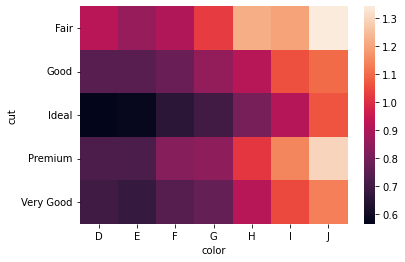

In [29]:
sns.heatmap(diamond_pivot.droplevel(0, axis=1))

<AxesSubplot:>

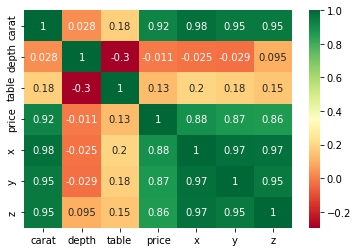

In [30]:
sns.heatmap(
    diamonds.corr(),
    annot=True,
    cmap="RdYlGn",
)

# FacetGrid

In [31]:
housing_raw = pd.read_csv(
    "./housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

bins = np.linspace(0, 1750000, 8)
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1-1.25m", "1.25m-1.5m", "1.5m+"]

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(
        region_name = housing_raw["region_name"].str[0:-11],
        price_bins = pd.cut(housing_raw["median_active_list_price"], 
                            bins=bins, 
                            labels=labels
                           )
    )
)

county_list = ["Los Angeles", "San Diego", "San Francisco", "Tulare"]

ca_housing = ca_housing.loc[ca_housing["region_name"].isin(county_list)]

ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


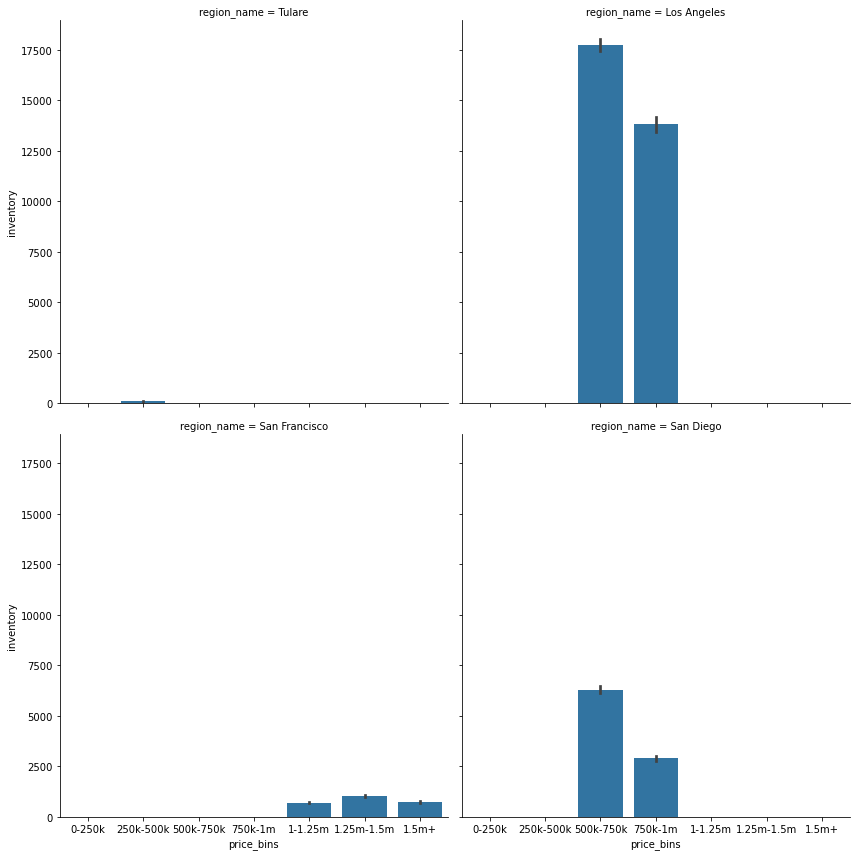

In [32]:
g = sns.FacetGrid(
    ca_housing, 
    col="region_name", 
    col_wrap=2,
    height=6,
)

g.map_dataframe(sns.barplot, x="price_bins", y="inventory")